**Import Libraries**

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from textblob import TextBlob
%pip install emoji
import emoji

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Read Fake File**

In [194]:
df1= pd.read_csv("Fake.csv")
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Keep only Text column and make label column**

In [195]:
df1.drop('title', axis=1, inplace=True )
df1.drop('subject', axis=1, inplace=True )
df1.drop('date', axis=1, inplace=True )
df1['label']='0'
df1

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


**Read True File**

In [196]:
df2= pd.read_csv("True.csv")
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**Keep only Text column and make label column**

In [197]:
df2.drop('title', axis=1, inplace=True )
df2.drop('subject', axis=1, inplace=True )
df2.drop('date', axis=1, inplace=True )
df2['label']='1'
df2

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [198]:
df1.shape

(23481, 2)

In [199]:
df2.shape

(21417, 2)

**Concatenate the two csv files in one csv file**

In [200]:
df = pd.concat([df1, df2])

# Write the concatenated DataFrame to a new CSV file
df.to_csv('df.csv', index=False)

In [201]:
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [202]:
df.shape

(44898, 2)

**Dataset Columns**

In [203]:
df.columns

Index(['text', 'label'], dtype='object')

**Shuffle the dataset(new File)**

In [204]:
import random

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=random.seed())
df.head()

,text,label
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1
16197,"Whether from incompetence or malice, the Immig...",0
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0
12189,GENEVA (Reuters) - The United Nations human ri...,1


**Dataset Description**

In [205]:
df.describe()

,text,label
count,44898,44898
unique,38646,2
top,,0
freq,627,23481


**Dataset Information**

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 13530 to 21583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


**Dataset Data Types**

In [207]:
df.dtypes

text     object
label    object
dtype: object

**Check null values**

In [208]:
df.isna()

,text,label
13530,False,False
5198,False,False
16197,False,False
19376,False,False
12189,False,False
...,...,...
22654,False,False
5636,False,False
23337,False,False
6660,False,False


**Drop Columns With NaN Values**

In [209]:
df.dropna()

,text,label
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1
16197,"Whether from incompetence or malice, the Immig...",0
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0
12189,GENEVA (Reuters) - The United Nations human ri...,1
...,...,...
22654,Randy Johnson 21st Century WireThe future is c...,0
5636,"On Friday, during an interview on Real Time wi...",0
23337,Tune in to the Alternate Current Radio Network...,0
6660,Republican members of Congress are complaining...,1


**check duplicates**

In [210]:
df.duplicated()

13530    False
5198     False
16197    False
19376    False
12189    False
         ...  
22654     True
5636     False
23337     True
6660     False
21583     True
Length: 44898, dtype: bool

**Remove Duplicates**

In [211]:
new_df=df.drop_duplicates()
new_df

,text,label
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1
16197,"Whether from incompetence or malice, the Immig...",0
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0
12189,GENEVA (Reuters) - The United Nations human ri...,1
...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1
5636,"On Friday, during an interview on Real Time wi...",0


**Dataset Shape**

In [212]:
new_df.shape

(38647, 2)

In [239]:
new_df.columns

Index(['text', 'label', 'cleaned_text'], dtype='object')

**Plot the label columns**

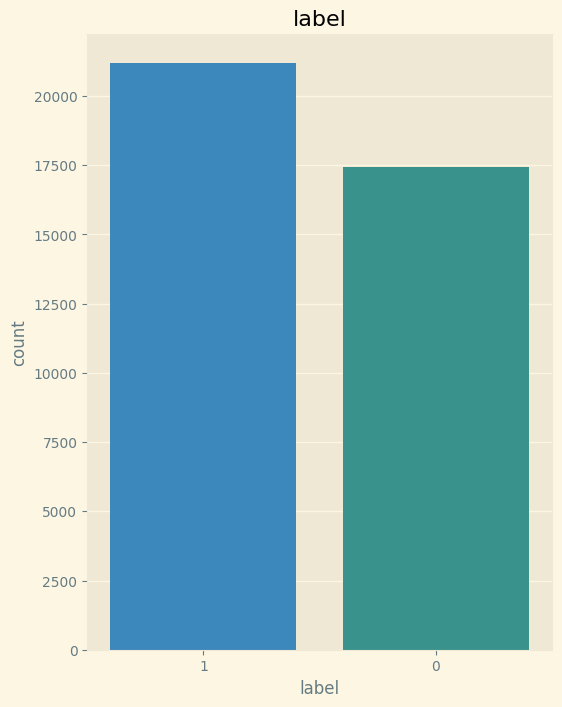

In [238]:
def drawPlots():
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(6, 8))
    plt.title("label")
    sns.countplot(x="label", data=new_df)
    plt.show()
drawPlots()

<Axes: ylabel='label'>

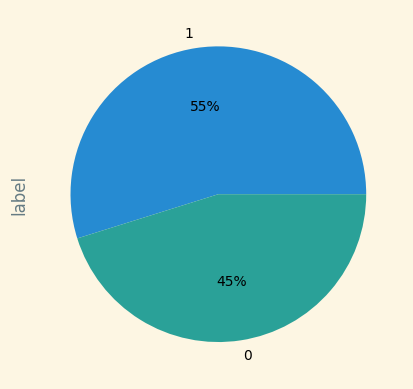

In [242]:
new_df.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

**Dataset Preprocessing**

In [243]:
new_df['cleaned_text'] = new_df['text'].str.lower()
new_df

<ipython-input-243-ac6212618ca2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['text'].str.lower()


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,dubai (reuters) - four supporters of yemen s f...
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,washington (reuters) - u.s. treasury secretary...
16197,"Whether from incompetence or malice, the Immig...",0,"whether from incompetence or malice, the immig..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,https://www.youtube.com/watch?v=iioeiumawro
12189,GENEVA (Reuters) - The United Nations human ri...,1,geneva (reuters) - the united nations human ri...
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,frankfurt/washington (reuters) - some democrat...
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,washington (reuters) - muslims across the unit...
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,seoul (reuters) - u.s. president donald trump’...
5636,"On Friday, during an interview on Real Time wi...",0,"on friday, during an interview on real time wi..."


In [244]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1\1+', r'\1\1', text)
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_repeating_char(x))
new_df


<ipython-input-244-00693c88b70e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_repeating_char(x))


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,dubai (reuters) - four supporters of yemen s f...
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,washington (reuters) - u.s. treasury secretary...
16197,"Whether from incompetence or malice, the Immig...",0,"whether from incompetence or malice, the immig..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,https://ww.youtube.com/watch?v=iioeiumawro
12189,GENEVA (Reuters) - The United Nations human ri...,1,geneva (reuters) - the united nations human ri...
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,frankfurt/washington (reuters) - some democrat...
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,washington (reuters) - muslims across the unit...
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,seoul (reuters) - u.s. president donald trump’...
5636,"On Friday, during an interview on Real Time wi...",0,"on friday, during an interview on real time wi..."


In [245]:
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9_]+', r' ', text)
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_mentions(x))
new_df

<ipython-input-245-6c31703758bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_mentions(x))


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,dubai (reuters) - four supporters of yemen s f...
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,washington (reuters) - u.s. treasury secretary...
16197,"Whether from incompetence or malice, the Immig...",0,"whether from incompetence or malice, the immig..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,https://ww.youtube.com/watch?v=iioeiumawro
12189,GENEVA (Reuters) - The United Nations human ri...,1,geneva (reuters) - the united nations human ri...
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,frankfurt/washington (reuters) - some democrat...
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,washington (reuters) - muslims across the unit...
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,seoul (reuters) - u.s. president donald trump’...
5636,"On Friday, during an interview on Real Time wi...",0,"on friday, during an interview on real time wi..."


In [246]:
def remove_hashtag(text):
    return re.sub(r'#[A-Za-z0-9_]+', r' ', text)
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_hashtag(x))
new_df


<ipython-input-246-f2ec6ca33ce3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_hashtag(x))


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,dubai (reuters) - four supporters of yemen s f...
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,washington (reuters) - u.s. treasury secretary...
16197,"Whether from incompetence or malice, the Immig...",0,"whether from incompetence or malice, the immig..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,https://ww.youtube.com/watch?v=iioeiumawro
12189,GENEVA (Reuters) - The United Nations human ri...,1,geneva (reuters) - the united nations human ri...
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,frankfurt/washington (reuters) - some democrat...
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,washington (reuters) - muslims across the unit...
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,seoul (reuters) - u.s. president donald trump’...
5636,"On Friday, during an interview on Real Time wi...",0,"on friday, during an interview on real time wi..."


In [247]:
def remove_links(text):
    return re.sub(r'http\S+|www.\S+|<.*?>', r' ', text)
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_links(x))
new_df

<ipython-input-247-90f3664240ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_links(x))


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,dubai (reuters) - four supporters of yemen s f...
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,washington (reuters) - u.s. treasury secretary...
16197,"Whether from incompetence or malice, the Immig...",0,"whether from incompetence or malice, the immig..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,
12189,GENEVA (Reuters) - The United Nations human ri...,1,geneva (reuters) - the united nations human ri...
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,frankfurt/washington (reuters) - some democrat...
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,washington (reuters) - muslims across the unit...
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,seoul (reuters) - u.s. president donald trump’...
5636,"On Friday, during an interview on Real Time wi...",0,"on friday, during an interview on real time wi..."


In [248]:
import string

def remove_punctuation(punc):
    for char in string.punctuation:
        punc = punc.replace(char, ' ')
    return punc
new_df['cleaned_text'] = new_df['cleaned_text'].apply(remove_punctuation)
new_df

<ipython-input-248-f8536bb794b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['cleaned_text'].apply(remove_punctuation)


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,dubai reuters four supporters of yemen s f...
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,washington reuters u s treasury secretary...
16197,"Whether from incompetence or malice, the Immig...",0,whether from incompetence or malice the immig...
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,
12189,GENEVA (Reuters) - The United Nations human ri...,1,geneva reuters the united nations human ri...
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,frankfurt washington reuters some democrat...
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,washington reuters muslims across the unit...
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,seoul reuters u s president donald trump’...
5636,"On Friday, during an interview on Real Time wi...",0,on friday during an interview on real time wi...


In [249]:
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: word_tokenize(x))
new_df

<ipython-input-249-31feeb657d53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: word_tokenize(x))


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,"[dubai, reuters, four, supporters, of, yemen, ..."
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,"[washington, reuters, u, s, treasury, secretar..."
16197,"Whether from incompetence or malice, the Immig...",0,"[whether, from, incompetence, or, malice, the,..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,[]
12189,GENEVA (Reuters) - The United Nations human ri...,1,"[geneva, reuters, the, united, nations, human,..."
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,"[frankfurt, washington, reuters, some, democra..."
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,"[washington, reuters, muslims, across, the, un..."
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,"[seoul, reuters, u, s, president, donald, trum..."
5636,"On Friday, during an interview on Real Time wi...",0,"[on, friday, during, an, interview, on, real, ..."


In [250]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
new_df['cleaned_text']= new_df['cleaned_text'].apply(lambda x: [item for item in x if item not in stop_words])
new_df

<ipython-input-250-29280422b46b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text']= new_df['cleaned_text'].apply(lambda x: [item for item in x if item not in stop_words])


,text,label,cleaned_text
13530,DUBAI (Reuters) - Four supporters of Yemen s f...,1,"[dubai, reuters, supporters, yemen, s, preside..."
5198,WASHINGTON (Reuters) - U.S. Treasury Secretary...,1,"[washington, reuters, u, s, treasury, secretar..."
16197,"Whether from incompetence or malice, the Immig...",0,"[incompetence, malice, immigration, act, 1990,..."
19376,https://www.youtube.com/watch?v=IioEIUmawRo,0,[]
12189,GENEVA (Reuters) - The United Nations human ri...,1,"[geneva, reuters, united, nations, human, righ..."
...,...,...,...
2748,FRANKFURT/WASHINGTON (Reuters) - Some Democrat...,1,"[frankfurt, washington, reuters, democratic, m..."
7077,WASHINGTON (Reuters) - Muslims across the Unit...,1,"[washington, reuters, muslims, united, states,..."
5699,SEOUL (Reuters) - U.S. President Donald Trump’...,1,"[seoul, reuters, u, s, president, donald, trum..."
5636,"On Friday, during an interview on Real Time wi...",0,"[friday, interview, real, time, maher, liberta..."


In [251]:
type(new_df.cleaned_text.values)

numpy.ndarray

In [252]:
type(new_df.text)

pandas.core.series.Series

In [253]:
x = new_df["cleaned_text"]
y = new_df["label"]

**TF-IDF Featrue Extraction**

In [254]:
vec = TfidfVectorizer(stop_words="english")

vec.fit(new_df.text.values)
features = vec.transform(new_df.label.values)

In [255]:
features.shape

(38647, 121690)

In [256]:
X = features
ylabels = new_df['label'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.25, random_state=0)

In [257]:
from sklearn.svm import LinearSVC
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [258]:
predictions = svm_classifier.predict(X_test)
predictions

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [259]:
print(accuracy_score(y_test, predictions))

0.5568205340509211


In [260]:
print(confusion_matrix(y_test,predictions))

[[   0 4282]
 [   0 5380]]


In [261]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4282
           1       0.56      1.00      0.72      5380

    accuracy                           0.56      9662
   macro avg       0.28      0.50      0.36      9662
weighted avg       0.31      0.56      0.40      9662



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [263]:

pred_lr=LR.predict(X_test)
pred_lr

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [264]:
LR.score(X_test, pred_lr)

1.0

In [265]:
print(classification_report(y_test, pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4282
           1       0.56      1.00      0.72      5380

    accuracy                           0.56      9662
   macro avg       0.28      0.50      0.36      9662
weighted avg       0.31      0.56      0.40      9662



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
